In [132]:
import numpy as np

class mag_layout:
    def __init__(self, layout=''):
        self.lam = 1
        self.layout = layout

    def get_structure(self):
        return self.layout

    def make_well(self, scale):
        lam = self.lam
        self.scale = scale
        well = (-7*scale*lam, -5*scale*lam, 7*scale*lam, 5*scale*lam)
        element = {'WELL': {'well1': {'rect': well, 'color': 'black', 'label': 'well'}}}
        self.layout = element
        return element

    def unit_mos(self, scale, pos):
        lam = self.lam
        self.scale = scale
        contact = (-scale*lam, -scale*lam, scale*lam, scale*lam)
        diff = (-3*scale*lam, -2*scale*lam, 3*scale*lam, 2*scale*lam)

        metal_h = (-round(6.5*scale*lam), -round(1.5*scale*lam), round(6.5*scale*lam), round(1.5*scale*lam))
        metal_v = (-scale*lam, -round(3.5*scale*lam), scale*lam, round(3.5*scale*lam))

        element = {'MOS': {}}
        element['MOS']['contact1'] = {'rect': self.__shift_rect(contact, -5*scale*lam, 0), 'color': 'blue', 'label': 'dcontact'}
        element['MOS']['contact2'] = {'rect': self.__shift_rect(contact, 5*scale*lam, 0), 'color': 'blue', 'label': 'dcontact'}
        element['MOS']['diffusion'] = {'rect': element['MOS']['contact1']['rect'][0:2] + element['MOS']['contact2']['rect'][2:4], 'color': 'magenta', 'label': 'diffusion'}

        if pos == 'ul':
            element['MOS']['substratecontact'] = {'rect': self.__shift_rect(contact, -5*scale*lam, 5*scale*lam), 'color': 'black', 'label': 'substratecontact'}
            element['MOS']['metal1'] = {'rect': self.__shift_rect(metal_v, -5*scale*lam, -3*scale*lam), 'color': 'red', 'label': 'metal1'}
        if pos == 'dl':
            element['MOS']['substratecontact'] =  {'rect': self.__shift_rect(contact, -5*scale*lam, -5*scale*lam), 'color': 'black', 'label': 'substratecontact'}
            element['MOS']['metal1'] = {'rect': self.__shift_rect(metal_v, -5*scale*lam, -3*scale*lam), 'color': 'red', 'label': 'metal1'}
        if pos == 'ur':
            element['MOS']['substratecontact'] = {'rect': self.__shift_rect(contact, 5*scale*lam, 5*scale*lam), 'color': 'black', 'label': 'substratecontact'}
            element['MOS']['metal1'] = {'rect': self.__shift_rect(metal_v, -5*scale*lam, 2.5*scale*lam), 'color': 'red', 'label': 'metal1'}
            element['MOS']['metal2'] = {'rect': self.__shift_rect(metal_h, 0, 5*scale*lam), 'color': 'red', 'label': 'metal1'}
        if pos == 'dr':
            element['MOS']['substratecontact'] =  {'rect': self.__shift_rect(contact, 5*scale*lam, -5*scale*lam), 'color': 'black', 'label': 'substratecontact'}
            element['MOS']['metal1'] = {'rect': self.__shift_rect(metal_v, -5*scale*lam, -2.5*scale*lam), 'color': 'red', 'label': 'metal1'}
            element['MOS']['metal2'] = {'rect': self.__shift_rect(metal_h, 0, -5*scale*lam), 'color': 'red', 'label': 'metal1'}
        self.layout = element
        return element

    def common_gate(self,scale,length):
        lam = self.lam
        gate = (-scale*lam, -round(scale*length*lam/2), scale*lam, round(scale*length*lam/2))
        element = {'MOS': {'gate': {'rect': gate, 'color': 'red', 'label': 'polysilicon'}}}
        self.layout = element
        return element

    def contact_common_gate(self, scale, shift_x, shift_y):
        lam = self.lam
        contact_gate = (-scale*lam, -scale*lam, scale*lam, scale*lam)
        element = {'Connect': {'contact': {'rect': self.__shift_rect(contact_gate, scale*shift_x, scale*shift_y), 'color': 'red', 'label': 'polycontact'}}}
        self.layout = element
        return element

    def connect_mos(self,mos10, mos20, pos):
        mos1 = mos10.get_structure()
        mos2 = mos20.get_structure()
        print(mos1)
        print(mos2)
        if pos == 'right':
            element = {'Connect': {'line': {'rect': mos1['MOS']['contact2']['rect'][0:2] + mos2['MOS']['contact2']['rect'][2:4], 'color': 'black', 'label': 'metal1'}}}
        else:
            element = {'Connect': {'line': {'rect': mos1['MOS']['contact1']['rect'][0:2] + mos2['MOS']['contact1']['rect'][2:4], 'color': 'black', 'label': 'metal1'}}}
        self.layout = element
        return element

    def dopant(self, doping):
        self.doping = doping
        structure = self.layout
        for key in structure.keys():
            if key == 'MOS':
                for k in structure[key].keys():
                    label = structure[key][k]['label']
                    if label == 'dcontact' or label == 'diffusion':
                        structure[key][k]['label'] = doping + label
                    if label == 'substratecontact':
                        if doping == 'n':
                            structure[key][k]['label'] = 'nsubstratencontact'
                        else:
                            structure[key][k]['label'] = 'psubstratepcontact'

            if key == 'WELL':
                for k in structure[key].keys():
                    label = structure[key][k]['label']
                    if label == 'well':
                        structure[key][k]['label'] = doping + label
        self.layout = structure
        return structure

    def __shift_rect(self, rect, x_shift, y_shift):
        return (round(rect[0] + x_shift), round(rect[1] + y_shift), round(rect[2] + x_shift), round(rect[3] + y_shift))

    def __rotate_rect(self, rect, x_center, y_center, angle):
        theta = angle / 180 * np.pi
        xleft_new = round(np.cos(theta) * (rect[0] - x_center) - np.sin(theta) * (rect[1] - y_center) + x_center)
        yleft_new = round(np.sin(theta) * (rect[0] - x_center) + np.cos(theta) * (rect[1] - y_center) + y_center)
        xright_new = round(np.cos(theta) * (rect[2] - x_center) - np.sin(theta) * (rect[3] - y_center) + x_center)
        yright_new = round(np.sin(theta) * (rect[2] - x_center) + np.cos(theta) * (rect[3] - y_center) + y_center)
        return xleft_new, yleft_new, xright_new, yright_new


    def shift_structure(self, x_shift, y_shift):
        structure = self.layout
        new_struct = {}
        for category in structure.keys():
            new_struct[category] = {}
            for layername in structure[category].keys():
                one_rect = {}
                for key in structure[category][layername].keys():
                    if key == 'rect':
                        one_rect['rect'] = self.__shift_rect(structure[category][layername][key], x_shift, y_shift)
                    else:
                        one_rect[key] = structure[category][layername][key]
                new_struct[category][layername] = one_rect
        self.layout = new_struct
        return new_struct


    def rotate_structure(self, x_center, y_center, angle):
        structure = self.layout
        new_struct = {}
        for category in structure.keys():
            new_struct[category] = {}
            for layername in structure[category].keys():
                one_rect = {}
                for key in structure[category][layername].keys():
                    if key == 'rect':
                        one_rect['rect'] = self.__rotate_rect(structure[category][layername][key], x_center, y_center, angle)
                    else:
                        one_rect[key] = structure[category][layername][key]
                new_struct[category][layername] = one_rect
        self.layout = new_struct
        return new_struct

structures = []

pmos = mag_layout()
pmos.unit_mos(scale=10, pos='ur')
pmos.dopant(doping='p')
pmos.shift_structure(x_shift=0, y_shift=60)
print(pmos.get_structure())
structures.append(pmos.get_structure())

nmos = mag_layout()
nmos.unit_mos(scale=10, pos='dr')
nmos.dopant(doping='n')
nmos.shift_structure(x_shift=0, y_shift=-60)
print(nmos.get_structure())
structures.append(nmos.get_structure())

gate = mag_layout()
gate.common_gate(scale=10, length=15)
print(gate.get_structure())
gate.shift_structure(x_shift=0, y_shift=0)
structures.append(gate.get_structure())

nwell = mag_layout()
nwell.make_well(10)
nwell.dopant(doping='n')
nwell.shift_structure(x_shift=0, y_shift=85)
print(nwell.get_structure())
structures.append(nwell.get_structure())

connect = mag_layout()
connect.connect_mos(nmos, pmos, pos='right')
print(connect.get_structure())
structures.append(connect.get_structure())

polycontact = mag_layout()
polycontact.contact_common_gate(scale=10, shift_x=-2, shift_y=0)
print(polycontact.get_structure())
structures.append(polycontact.get_structure())

{'MOS': {'contact1': {'rect': (-60, 50, -40, 70), 'color': 'blue', 'label': 'pdcontact'}, 'contact2': {'rect': (40, 50, 60, 70), 'color': 'blue', 'label': 'pdcontact'}, 'diffusion': {'rect': (-60, 50, 60, 70), 'color': 'magenta', 'label': 'pdiffusion'}, 'substratecontact': {'rect': (40, 100, 60, 120), 'color': 'black', 'label': 'psubstratepcontact'}, 'metal1': {'rect': (-60, 50, -40, 120), 'color': 'red', 'label': 'metal1'}, 'metal2': {'rect': (-65, 95, 65, 125), 'color': 'red', 'label': 'metal1'}}}
{'MOS': {'contact1': {'rect': (-60, -70, -40, -50), 'color': 'blue', 'label': 'ndcontact'}, 'contact2': {'rect': (40, -70, 60, -50), 'color': 'blue', 'label': 'ndcontact'}, 'diffusion': {'rect': (-60, -70, 60, -50), 'color': 'magenta', 'label': 'ndiffusion'}, 'substratecontact': {'rect': (40, -120, 60, -100), 'color': 'black', 'label': 'nsubstratencontact'}, 'metal1': {'rect': (-60, -120, -40, -50), 'color': 'red', 'label': 'metal1'}, 'metal2': {'rect': (-65, -125, 65, -95), 'color': 'red',

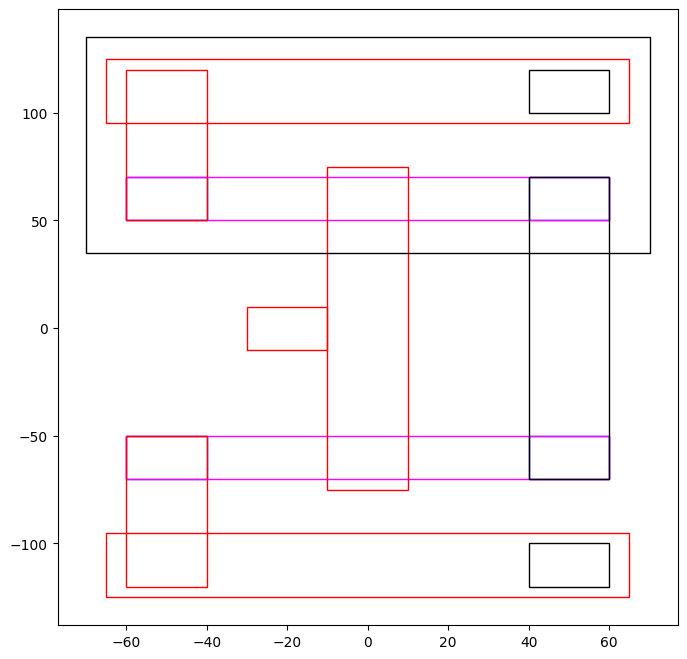

In [133]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def append_plt_struct(ax, structures):
    for structure in structures:
        for category in structure.keys():
            for key, info in  structure[category].items():
                shape = info['rect']
                color = info['color']
                rect = Rectangle((shape[0], shape[1]), shape[2]-shape[0], shape[3]-shape[1], edgecolor=color, facecolor='none', linewidth=1)
                ax.add_patch(rect)
    return ax

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111)
ax = append_plt_struct(ax, structures)
#ax = append_plt_struct(ax, shift_struct(element['NMOS'], 30, 0))
#ax = append_plt_struct(ax, rotate_struct(shift_struct(element['NMOS'], 30, 0), 0, 0, 90))
#ax.set_xlim(-10, 40)
#ax.set_ylim(-10, 40)
plt.gca().autoscale(enable=True, axis='both', tight=False)
plt.show()

In [134]:
import time

def compose_magic_structures(structures):
    mag = ''
    label = ''
    for structure in structures:
        for category in structure.keys():
            onestructure = structure[category]
            for key, info in  onestructure.items():
                shape = info['rect']
                if label != info['label']:
                    label = info['label']
                    mag += '<< %s >>\n' % label
                mag += 'rect %s\n' % ' '.join([str(x) for x in shape])
    magic = 'magic\ntech scmos\nmagscale 1 3\ntimestamp %d\n%s<< end >>' % (time.time(), mag)
    return magic

print(compose_magic_structures(structures))

magic
tech scmos
magscale 1 3
timestamp 1758970406
<< pdcontact >>
rect -60 50 -40 70
rect 40 50 60 70
<< pdiffusion >>
rect -60 50 60 70
<< psubstratepcontact >>
rect 40 100 60 120
<< metal1 >>
rect -60 50 -40 120
rect -65 95 65 125
<< ndcontact >>
rect -60 -70 -40 -50
rect 40 -70 60 -50
<< ndiffusion >>
rect -60 -70 60 -50
<< nsubstratencontact >>
rect 40 -120 60 -100
<< metal1 >>
rect -60 -120 -40 -50
rect -65 -125 65 -95
<< polysilicon >>
rect -10 -75 10 75
<< nwell >>
rect -70 35 70 135
<< metal1 >>
rect 40 -70 60 70
<< polycontact >>
rect -30 -10 -10 10
<< end >>
